# This notebook is created to practice common used hypothesis test technique

1. Z-test
2. T-test
3. Wilcoxon signed rank test.
3. Rank-Sum test
4. F-test
5. Chi-square test
6. Pearson Chi-square test for goodness of fit
7. Permutation test

## 1. Z-test
Z-test is used when test statistics follows a standard normal distribution $N(0, 1)$ or can be appriximated by $N(0, 1)$ at large sample size asymptotes ($n\to \infty$) under central limit theorem (CLT).

Example 1.1. (a one-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is known.

Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $T>Z(\alpha)$

Example 1.2. (a two-sided Z-test): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is known.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1\neq\mu_0, \sigma)$, where $\sigma$ is known.

In this case, while the alternative hypothesis is not fully specified because we don't know what $\mu_1$ is, the null hypothesis is fully specified because we know both $\mu_0$ and $\sigma$. Then, the test statistics $T=\frac{\sqrt(n)(\bar{X}-\mu_0)}{\sigma} \sim N(0, 1)$. We reject null hypothesis at significance level-$\alpha$ when $|T|>Z(\alpha/2)$

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

### Example. One sample two-tail Z test.

Test statistics T:  5.04403 and P-vale 0.00000046
Observed mean:  1.00881, 95% Confidence Interval for keeping H0: [-0.39199 ,  0.39199]


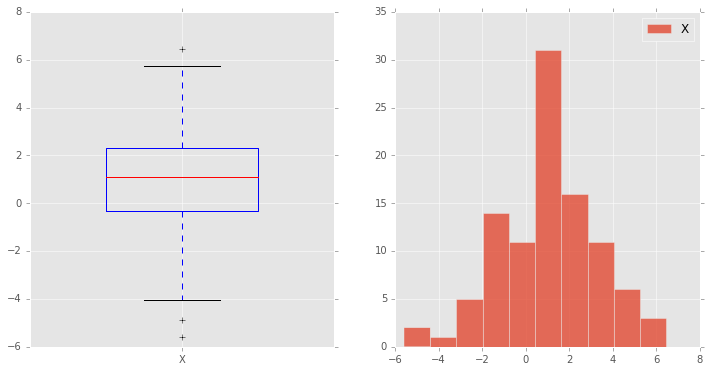

In [106]:
plt.style.use('ggplot')

def plot_dignostics_twosample(X0, X1, labels=['X0','X1']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X0,X1], positions=[0, 1],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X0,alpha=0.8)
    plt.hist(X1,alpha=0.8)
    plt.legend(labels)

def plot_dignostics_onesample(X, labels=['X']):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.boxplot([X],labels=labels,widths=0.5)
    plt.subplot(1,2,2)
    plt.hist(X,alpha=0.8)
    plt.legend(labels)

def zscore(alpha):
    return scipy.stats.norm.ppf(1-alpha)

def p_value(T):
    return (1-scipy.stats.norm.cdf(abs(T)))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
X = X1 
plot_dignostics_onesample(X)
se = sigma/np.sqrt(N)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))

### Example. Two samples two-tail Z test.

Test statistics T: -6.55187 and P-vale 0.00000000
Observed difference in mean: -1.06992, 95% Confidence Interval for keeping H0: [-0.32006 ,  0.32006]


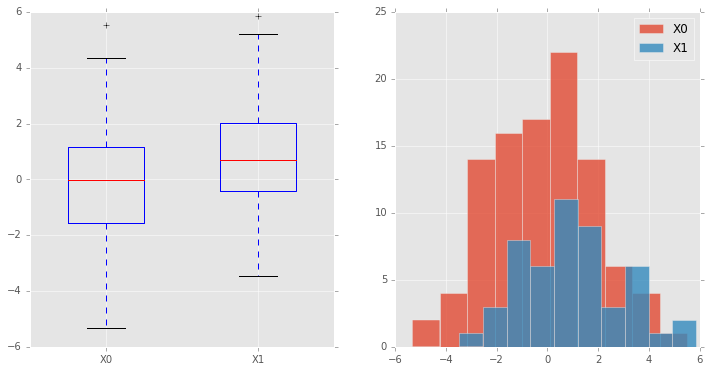

In [108]:
# Example. Two sample two-tail Z test
N1     = 100  # sample size
N2     = 50  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N1) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N2) # sample that follows alternative hypothesis.

#Two sample two-tail Z test.
# calculate z-score
# testing H1
plot_dignostics_twosample(X0,X1)
se = sigma/np.sqrt(N1 + N2)    # standard error, known
m = zscore(alpha/2)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X0) - np.mean(X1))/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T)))
print('Observed difference in mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X0)-np.mean(X1), -m*se, m*se))

## 2. T test

$t$-test is used when test statistics follows a student $t$-distribution. This arises when testing distribution mean when distribution variance is unknown and has to be estimated from the sample. Each sample point is assumed to follow iid normal distribution. $t$-distribution converges to normal distribution when sample size is large.

Example 2.1. (a one sample (or paired) one-sided T-test, equal variance): <br>
$H_0$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_0, \sigma)$, where $\sigma$ is unknown.<br>
$H_1$: $X_1, X_2, ..., X_n$ are generated by a IID normal distribution $N(\mu_1>\mu_0, \sigma)$, where $\sigma$ is unknown.

Unbiased estimate of $\sigma$ from sample $S$: 

$S^2=\frac{1}{n-1}\sum_{i}^{n} (X_i - \bar{X})^2$

There's a theorem (state without proof here) says $(n-1)S^2/\sigma^2 \sim \chi_{n-1}^2$

Using test statistics $T = \frac{\sqrt{n}(\bar{X}-\mu_0)}{S}$ follows a student $t$ distribution with degree of freedom $n-1$. This is because, the test statistics $T$ is indeed: 

$T = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{S/\sigma} = \frac{\sqrt{n}(\bar{X}-\mu_0)/\sigma}{\sqrt{S^2/\sigma^2}}= \frac{N(0,1)}{\sqrt{\chi_{n-1}^{2}/(n-1)}}$

We know student t-distribution with $n$ degree of freedom is defined as $\frac{N(0,1)}{\sqrt{\chi_{n}^{2}/(n)}}$


Similarly, for two-sample ($X_n$ and $Y_m$) $t$-test with equal variance, the test statistics
$T = \frac{(\bar{X}-\bar{Y})}{S_p \sqrt{\frac{1}{n}+\frac{1}{m}}}$, where $S_p$ is the unbiased pooled standard error:

$S_p^2 = \frac{1}{m+n-2} \left(\sum_{i=1}^{n}(X_i-\bar{X})^2 + \sum_{j=1}^{m} (Y_j-\bar{Y})^2 \right)$

In this case, $\mu_0$, $\mu_1$, and $\sigma$ are all unknown.
This test also exploit the fact that $S_p^2$ follows a $\chi_{m+n-1}^2$


Test statistics T:  0.48219 and P-vale 0.63073630
Observed mean:  1.00129, 95% Confidence Interval for keeping H0: [-4.12034 ,  4.12034]


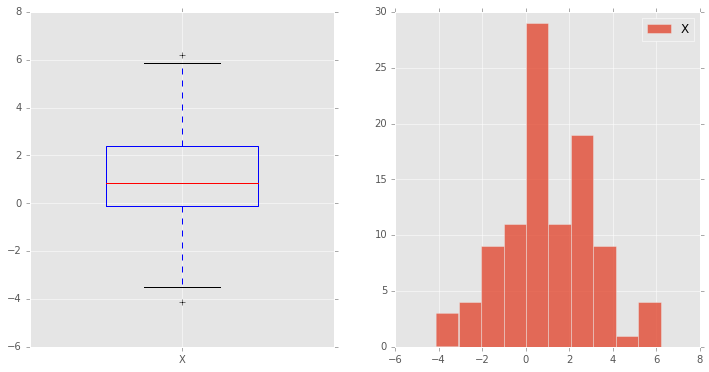

In [111]:
# One sample (paired) two tailed t-test

def tscore(alpha, df):
    return scipy.stats.t.ppf(1-alpha, df)

def p_value(T, df):
    return (1-scipy.stats.t.cdf(abs(T), df))*2

N     = 100  # sample size
mu0   = 0    # mean, if H0 is true
mu1   = 1    # mean, if H1 is true
sigma = 2  # standard deviation
alpha = 0.05 # significance level.

# generate random samples.
X0 = np.random.normal(loc=mu0, scale=sigma, size=N) # sample that follows null hypothesis.
X1 = np.random.normal(loc=mu1, scale=sigma, size=N) # sample that follows alternative hypothesis.

#One sample two-tail Z test.
# calculate z-score
# testing H1
df = N - 1
X = X1
plot_dignostics_onesample(X)
se = np.std(X, ddof=1)   # unbiased standard error, estimated from sample.
m = tscore(alpha/2, df)      # confidence margin determined by confidence level.

# test statistics
T = (np.mean(X) - mu0)/se

print('Test statistics T: %8.5f and P-vale %10.8f' % (T, p_value(T, df)))
print('Observed mean: %8.5f, 95%% Confidence Interval for keeping H0: [%8.5f , %8.5f]'%
      (np.mean(X), mu0-m*se, mu0 + m*se))